# Model Training and Classification

This notebook is an extension of the `analysis.ipynb` file. In this part, we will take the reduced data and train ML classifiers on it.

Please refer to the `.md` cells throughout the notebook for more perspective.

In [35]:
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

In [10]:
FILE_PATH = '/content/drive/MyDrive/Colab Notebooks/Projects/dmodel-breast-cancer/breast_cancer_pca.csv'
df = pd.read_csv(FILE_PATH)
df.shape

(569, 3)

In [12]:
df.head(3)

,PC1,PC2,target
0,9.192837,1.948583,1
1,2.387802,-3.768172,1
2,5.733896,-1.075174,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     569 non-null    float64
 1   PC2     569 non-null    float64
 2   target  569 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 13.5 KB


In [14]:
df['target'].value_counts()

,count
target,
0,357
1,212


In [16]:
x = df.drop('target', axis=1)
y = df['target']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=True, random_state=32)
x_train.shape, y_test.shape

((455, 2), (114,))

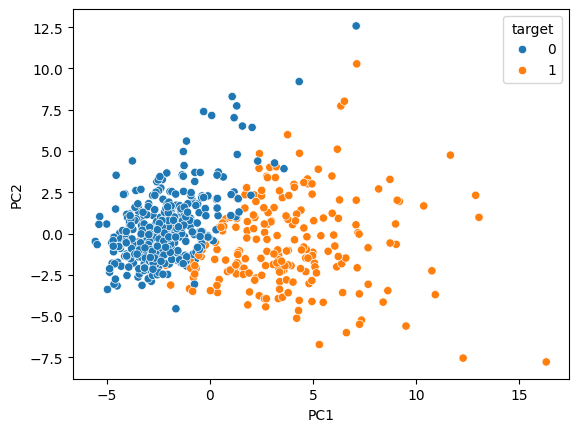

In [19]:
sns.scatterplot(x=df['PC1'], y=df['PC2'], hue=df['target'])
plt.show()

In [44]:
def evaluate_model(model_obj, data: tuple):
  y_pred = model_obj.predict(data[0])
  return {
      'accuracy': round(accuracy_score(data[1], y_pred), 2),
      'precision': round(precision_score(data[1], y_pred), 2),
      'recall': round(recall_score(data[1], y_pred), 2),
      'f1': round(f1_score(data[1], y_pred), 2)
  }

In [53]:
models = [SVC(), LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier()]
names = ['svm', 'logreg', 'dtree', 'rforest']
eval_df = []
for model, name in zip(models, names):
  start = time.time()
  m_obj = model.fit(x_train, y_train)
  print(f"Fitted {name} in: {round(time.time() - start, 2)} seconds.")
  m_eval = evaluate_model(m_obj, (x_test, y_test))
  m_eval['model'] = name
  eval_df.append(m_eval)
eval_df = pd.DataFrame(eval_df)

Fitted svm in: 0.01 seconds.
Fitted logreg in: 0.0 seconds.
Fitted dtree in: 0.0 seconds.
Fitted rforest in: 0.18 seconds.


In [62]:
eval_df = eval_df.sort_values(by='f1', ascending=False)

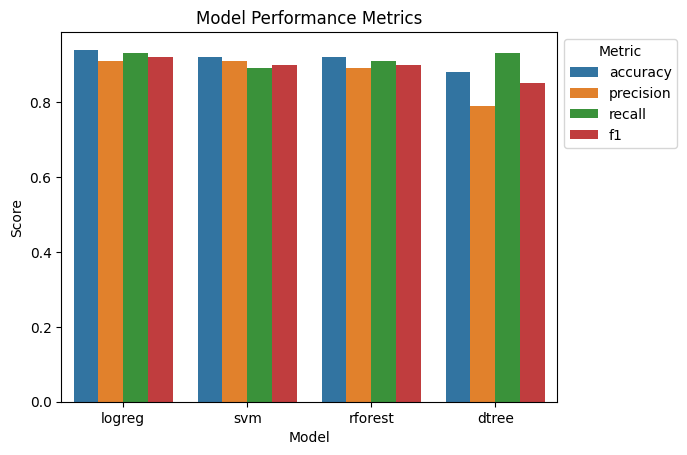

In [69]:
eval_df_melted = eval_df.melt(id_vars='model', value_vars=['accuracy', 'precision', 'recall', 'f1'], var_name='metric', value_name='value')
sns.barplot(x='model', y='value', hue='metric', data=eval_df_melted)
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(title='Metric', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()